**This is the PART-I of our analysis that involves Data preprocessing **

### The first file BR85_C_II.csv has the time series acceleration readings from 5 sensors. Each of the 5 sensor values corresponds to five columns as shown below. 

In [222]:
import pandas as pd
df=pd.read_csv("BR85_C_II.csv", delimiter='\t')

# df

### Time series and corresponding frequency spectrum for each of the raw time series values

In [223]:
import numpy as np
from numpy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal


# function for plotting raw values
def plottingForRaw(y1, lab0, lab1):
    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=14
    plt.style.use("seaborn")
    f, axarr=plt.subplots(2, figsize=(20,8))

    n = len(df.Time)
    T = 0.005
    Lx = n*T

    x = np.linspace(0, Lx, n)
    y=y1
    
    axarr[0].plot(x,y, label=lab0)
    axarr[0].set_xlabel('Time (s)')
    axarr[0].set_ylabel('acceleation (m/s2)')
    axarr[0].legend(loc="upper left")

    freqs=fftfreq(n,T) #Return the Discrete Fourier Transform sample frequencies
    mask=freqs>0
    fft_vals=fft(y)
    fft_theo=2.0*np.abs(fft_vals/n)
    axarr[1].plot(freqs[mask], fft_theo[mask], color='b', label=lab1)
    axarr[1].set_xlabel('Frequency (Hz)')
    axarr[1].set_ylabel('magnitude')
    axarr[1].legend(loc="upper left")
    plt.show()

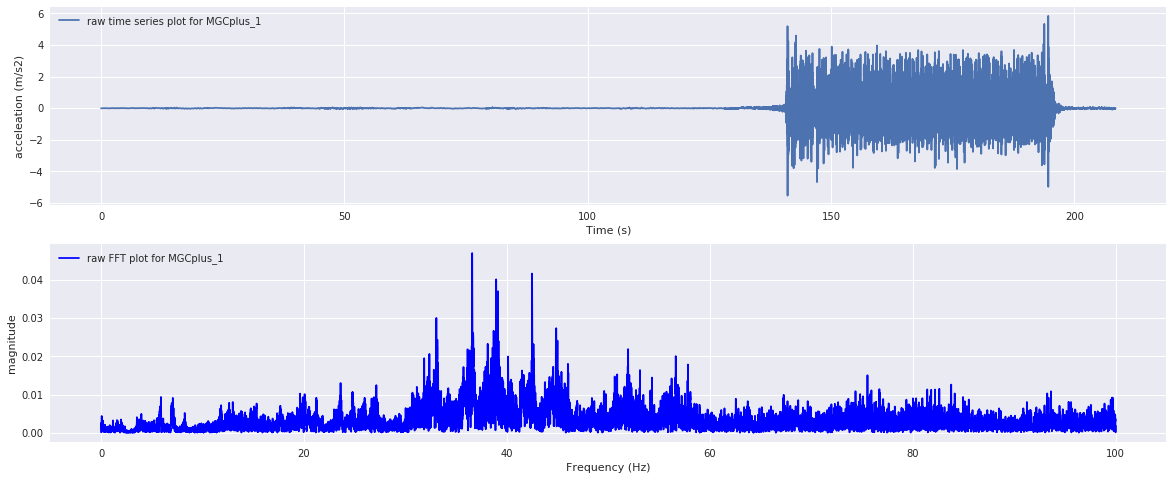

In [224]:
plottingForRaw(df.MGCplus_1,'raw time series plot for MGCplus_1', 'raw FFT plot for MGCplus_1')

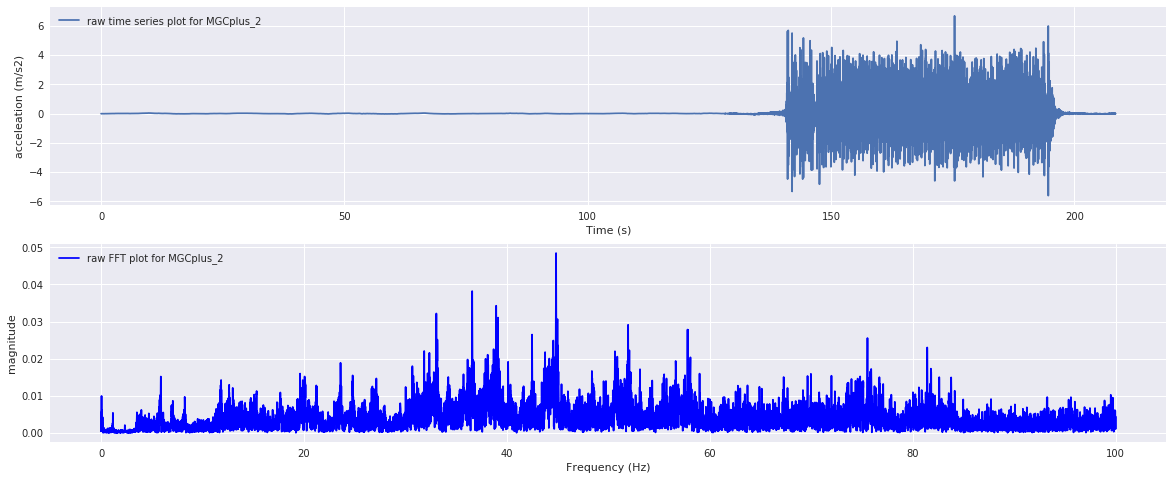

In [225]:
plottingForRaw(df.MGCplus_2,'raw time series plot for MGCplus_2', 'raw FFT plot for MGCplus_2')

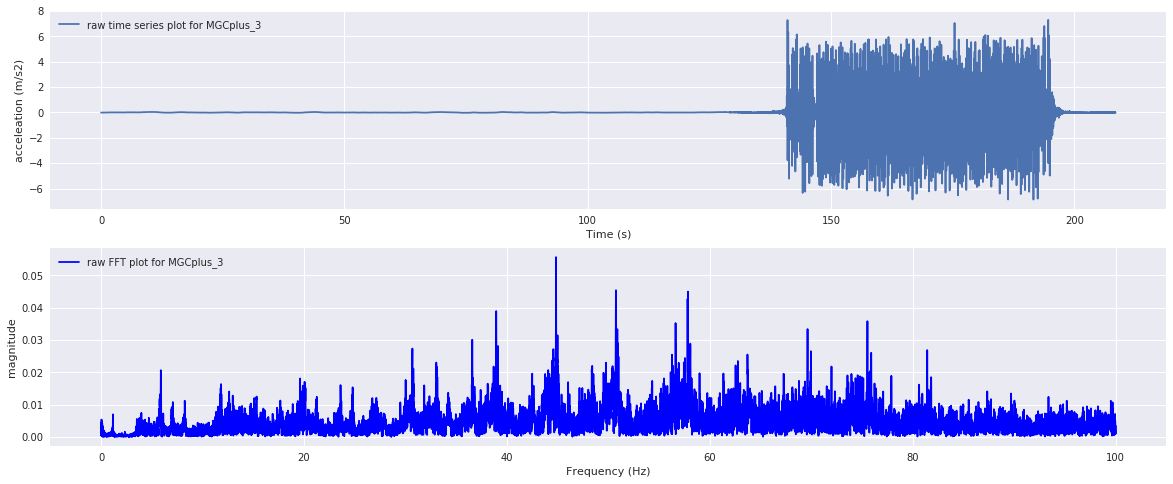

In [226]:
plottingForRaw(df.MGCplus_3,'raw time series plot for MGCplus_3', 'raw FFT plot for MGCplus_3')

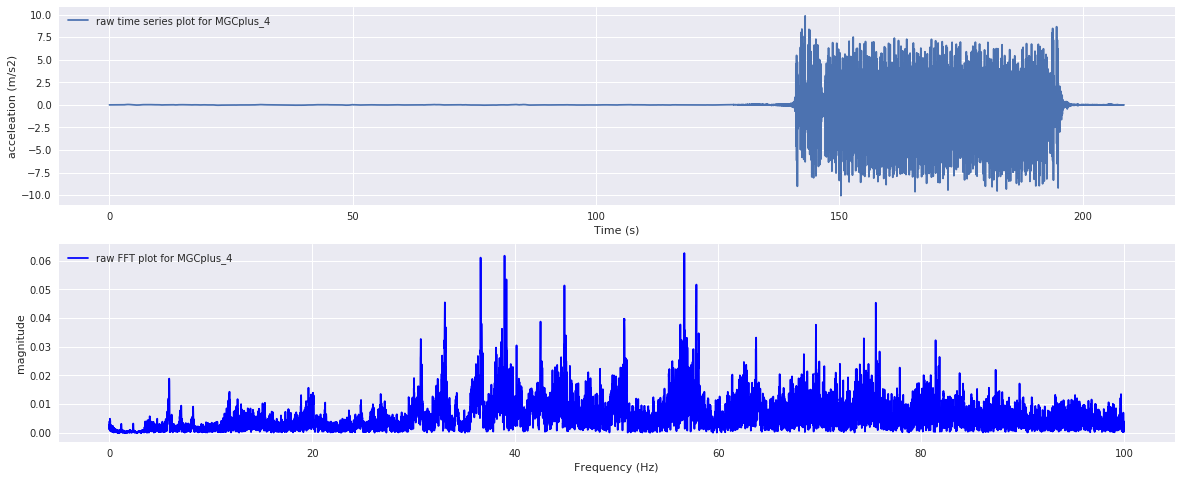

In [227]:
plottingForRaw(df.MGCplus_4,'raw time series plot for MGCplus_4', 'raw FFT plot for MGCplus_4')

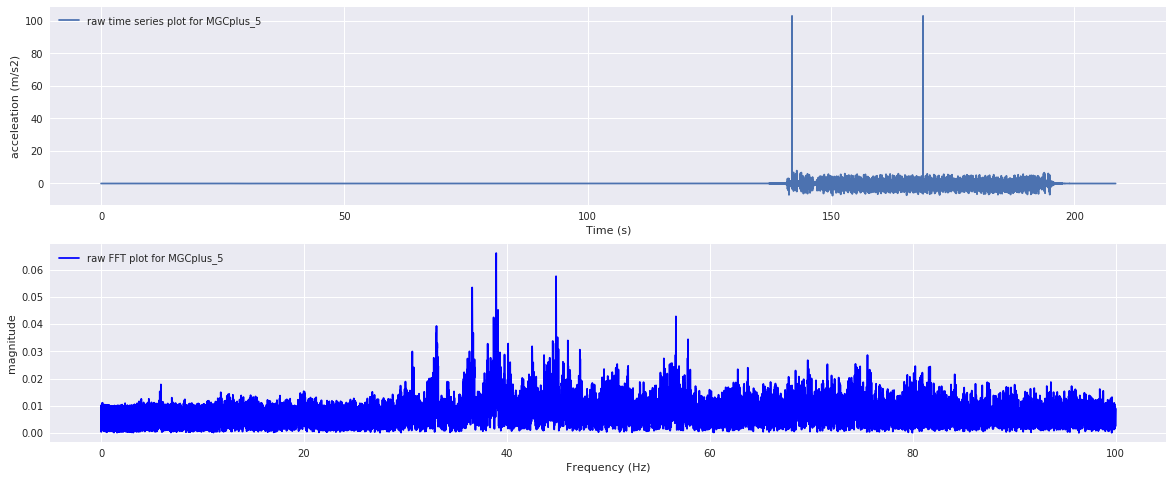

In [228]:
plottingForRaw(df.MGCplus_5,'raw time series plot for MGCplus_5', 'raw FFT plot for MGCplus_5')

### From the graph data, it seems like for the values of 5th accelerometer, outlier removal needs to be performed.

# Data preprocessing
## -> Outlier removal -> Interpolation -> Standardization

### For the convinience, we can split the 5 columns into 5 different csv files

### The time series data corresponding to first accelerometer is stored as -> MGCplus_1.csv

In [229]:
df=pd.read_csv('BR85_C_II.csv', delimiter='\t')
df = pd.concat([df.Time, df.MGCplus_1], axis=1)
#Time series data corresponding to first accelerometer
df.to_csv('MGCplus_1.csv', index=False)

# df

### Similarly we can split the main csv file to create more csv files for remaining sensor data

In [230]:
df=pd.read_csv('BR85_C_II.csv', delimiter='\t')
df = pd.concat([df.Time, df.MGCplus_2], axis=1)
#Time series data corresponding to second accelerometer
df.to_csv('MGCplus_2.csv', index=False)

df=pd.read_csv('BR85_C_II.csv', delimiter='\t')
df = pd.concat([df.Time, df.MGCplus_3], axis=1)
#Time series data corresponding to first accelerometer
df.to_csv('MGCplus_3.csv', index=False)

df=pd.read_csv('BR85_C_II.csv', delimiter='\t')
df = pd.concat([df.Time, df.MGCplus_4], axis=1)
#Time series data corresponding to first accelerometer
df.to_csv('MGCplus_4.csv', index=False)

df=pd.read_csv('BR85_C_II.csv', delimiter='\t')
df = pd.concat([df.Time, df.MGCplus_5], axis=1)
#Time series data corresponding to first accelerometer
df.to_csv('MGCplus_5.csv', index=False)

## 1) For outlier removal, DBSCAN (Density-based spatial clustering of applications with noise) algorithm is used that is available in Scikit learn library.

##### We will use DBSCAN on our 5th accelerometer dataset, it returns -1 for outlier values and 0 for non-outlier values

In [231]:
from sklearn.cluster import DBSCAN

df1=pd.read_csv('MGCplus_5.csv')
model=DBSCAN(eps=5, min_samples=15)
model.fit(df1)
labels = model.labels_
df=pd.DataFrame({'result':labels})
print(df.result.value_counts())

 0    41698
-1        2
Name: result, dtype: int64


#### There are 41698 non-outlier values and 2 outlier values in our MGCplus_5.csv

### Now for our fifth accelerometer data, the corresponding outlier and non-outlier readings are as follows

In [232]:
df1=pd.read_csv('MGCplus_5.csv')
model=DBSCAN(eps=5, min_samples=15)
model.fit(df1)
labels = model.labels_
df=pd.DataFrame({'result':labels})
elements=np.array(df)
elements=elements.reshape(elements.shape[0],1)
df=pd.DataFrame({'result':elements[:,0]})
df = pd.concat([df1.Time, df1.MGCplus_5, df.result], axis=1)
df.to_csv('MGCplus_5.csv', index=False)

df=pd.read_csv('MGCplus_5.csv')
df

,Time,MGCplus_5,result
0,0.000,-0.00387,0
1,0.005,-0.00423,0
2,0.010,-0.00458,0
3,0.015,-0.00455,0
4,0.020,-0.00468,0
5,0.025,-0.00475,0
6,0.030,-0.00432,0
7,0.035,-0.00400,0
8,0.040,-0.00402,0
9,0.045,-0.00417,0


### 'result' column shows '0' for the non-outlier values and '-1' for outlier values.

### The Outliers are shown below in the graph

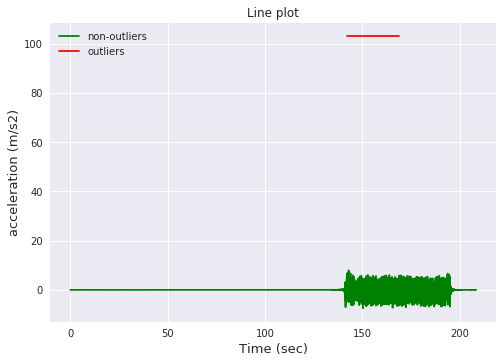

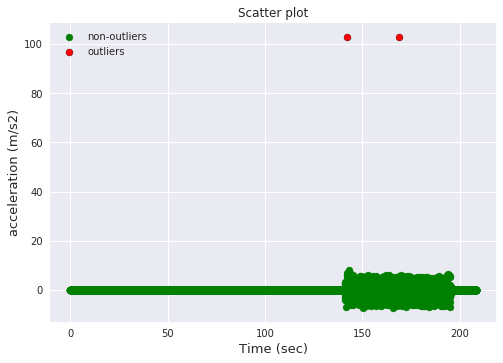

In [233]:
df=pd.read_csv('MGCplus_5.csv')

plt.figure(1)
a = plt.plot(df[df.result==0].Time, df[df.result==0].MGCplus_5, c='green', label='non-outliers')
plt.title('Line plot')
b = plt.plot(df[df.result==-1].Time, df[df.result==-1].MGCplus_5, c='red', label='outliers')
plt.xlabel('Time (sec)', fontsize=13)
plt.ylabel('acceleration (m/s2)', fontsize=13)
plt.legend(loc="upper left")

plt.figure(2)
plt.title("Scatter plot")
a = plt.scatter(df[df.result==0].Time, df[df.result==0].MGCplus_5, c='green')
b = plt.scatter(df[df.result==-1].Time, df[df.result==-1].MGCplus_5, c='red', edgecolor='k')
plt.xlabel('Time (sec)', fontsize=13)
plt.ylabel('acceleration (m/s2)', fontsize=13)
plt.legend([a, b],
           ["non-outliers",
            "outliers"],
           loc="upper left")
plt.show()


**The red dots show the presence of the outliers** 

#### Now outliers are removed entirely as follows

In [234]:
df= pd.read_csv('MGCplus_5.csv')
df.loc[df.result == -1, 'MGCplus_5'] = np.NaN
df2=pd.DataFrame({'ModifiedMGCplus_5':df.MGCplus_5})
df=pd.concat([df.Time, df.MGCplus_5, df.result, df2.ModifiedMGCplus_5], axis=1)
df.to_csv('MGCplus_5.csv', index=False)

# df

#### 'ModifiedMGCplus_5' column contains the values with non-outliers

## 2) Linear interpolation method is used to fill the NaN values in 'ModifiedMGCplus_5' column

In [235]:
df=pd.read_csv('MGCplus_5.csv')
df=df['ModifiedMGCplus_5'].interpolate(limit_direction='forward')
df=pd.DataFrame({'interpolated':df})
df.to_csv('interpolated.csv')

df1=pd.read_csv('MGCplus_5.csv')
df2=pd.read_csv('interpolated.csv')
df=pd.concat([df1.Time, df2.interpolated, df1.MGCplus_5, df1.result, df1.ModifiedMGCplus_5],axis=1)
df.to_csv('MGCplus_5.csv', index=False)


df

,Time,interpolated,MGCplus_5,result,ModifiedMGCplus_5
0,0.000,-0.00387,-0.00387,0,-0.00387
1,0.005,-0.00423,-0.00423,0,-0.00423
2,0.010,-0.00458,-0.00458,0,-0.00458
3,0.015,-0.00455,-0.00455,0,-0.00455
4,0.020,-0.00468,-0.00468,0,-0.00468
5,0.025,-0.00475,-0.00475,0,-0.00475
6,0.030,-0.00432,-0.00432,0,-0.00432
7,0.035,-0.00400,-0.00400,0,-0.00400
8,0.040,-0.00402,-0.00402,0,-0.00402
9,0.045,-0.00417,-0.00417,0,-0.00417


#### The column 'Interpolated' contains the interpolated value

## 3) Finally data standardization is performed on interpolated values. The final values are stored in column 'standardized'
#### standardization= (value-mean)/(standard deviation)

In [236]:
df1 = pd.read_csv('MGCplus_5.csv')
std=np.std(df1.interpolated)
mean=np.mean(df1.interpolated)

df=(df1.interpolated-mean)/std
df2=pd.DataFrame({'standardized':df})
df2.to_csv('standardized.csv')

df1=pd.read_csv('MGCplus_5.csv')
df2=pd.read_csv('standardized.csv')

df=pd.concat([df1.Time, df2.standardized, df1.interpolated, df1.MGCplus_5],axis=1)
df.to_csv('MGCplus_5.csv', index=False)

df=pd.read_csv("MGCplus_5.csv")
df

,Time,standardized,interpolated,MGCplus_5
0,0.000,-0.003764,-0.00387,-0.00387
1,0.005,-0.004277,-0.00423,-0.00423
2,0.010,-0.004777,-0.00458,-0.00458
3,0.015,-0.004734,-0.00455,-0.00455
4,0.020,-0.004920,-0.00468,-0.00468
5,0.025,-0.005020,-0.00475,-0.00475
6,0.030,-0.004406,-0.00432,-0.00432
7,0.035,-0.003949,-0.00400,-0.00400
8,0.040,-0.003978,-0.00402,-0.00402
9,0.045,-0.004192,-0.00417,-0.00417


#### 'standardized' column contains the final values after performing -> Outlier removal, Interpolation and Data standardization

### For 'standardized' column of MGCplus_5.csv, Fast Fourier Transform is performed on the time series data. The time domain curve and the frequency domain curve is shown as follows:

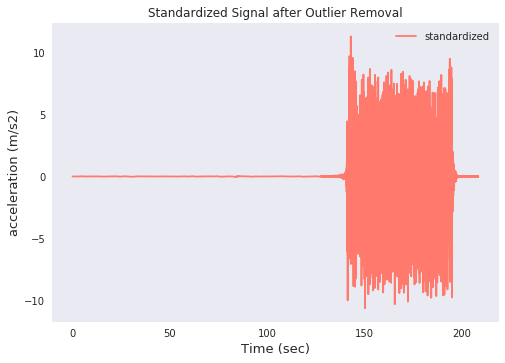

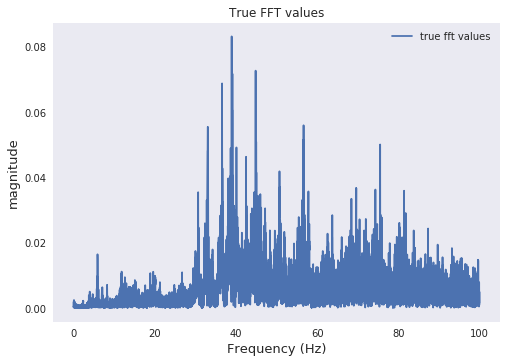

In [237]:
df = pd.read_csv('MGCplus_5.csv')

n = len(df.Time) #length of my dataset or sampled signal of length n
T = 0.005
Lx = n*T

x = np.linspace(0, Lx, n)
y=df.standardized

freqs=fftfreq(n,T) #Return the Discrete Fourier Transform sample frequencies.
mask=freqs>0
fft_vals=fft(y)
fft_theo=2.0*np.abs(fft_vals/n) #abs give only vector of complex term #1/n is a normalization factor. 
#fft_theo calculates the magnitude of signal at corresponding frequencies.

plt.figure(1)
plt.title('Standardized Signal after Outlier Removal')
plt.plot(df.Time, y, color='xkcd:salmon', label='standardized')
plt.xlabel('Time (sec)', fontsize=13)
plt.ylabel('acceleration (m/s2)', fontsize=13)
plt.legend()
plt.grid()

plt.figure(2)
plt.title('True FFT values')
plt.plot(freqs[mask], fft_theo[mask], label='true fft values')
plt.xlabel('Frequency (Hz)', fontsize=13)
plt.ylabel('magnitude', fontsize=13)
plt.legend()
plt.grid()

plt.show()

## Data standardisation must be performed on remaining accelerometer data files i.e 'MGCplus_1.csv', 'MGCplus_2.csv', 'MGCplus_3.csv' and 'MGCplus_4.csv'

### The final file is called 'standardBR85_C_II.csv', which will contain the final  values after performing Data-preprocessing.
### All the files can be found in the repository

In [238]:
df=pd.read_csv('standardizedBR85_C_II.csv', delimiter='\t')
df

,Time,standardizedMGCplus_1,standardizedMGCplus_2,standardizedMGCplus_3,standardizedMGCplus_4,standardizedMGCplus_5
0,0.000,-0.017934,-0.012381,-0.013405,0.000928,-0.003764
1,0.005,-0.017236,-0.011612,-0.013249,0.000928,-0.004277
2,0.010,-0.016809,-0.011328,-0.013306,0.000759,-0.004777
3,0.015,-0.016615,-0.011478,-0.013050,0.000928,-0.004734
4,0.020,-0.016208,-0.012014,-0.012709,0.000545,-0.004920
5,0.025,-0.014774,-0.011980,-0.011928,0.000297,-0.005020
6,0.030,-0.013591,-0.011679,-0.011260,0.000353,-0.004406
7,0.035,-0.012971,-0.011612,-0.011090,0.000500,-0.003949
8,0.040,-0.012351,-0.011863,-0.010848,0.000387,-0.003978
9,0.045,-0.011595,-0.012164,-0.011189,0.000072,-0.004192


# Below is the comparison among each sensor value before processing and after processing

In [239]:
df1=pd.read_csv('BR85_C_II.csv', delimiter='\t')
df2=pd.read_csv('standardizedBR85_C_II.csv', delimiter='\t')

### The function for plotting the graphs

In [240]:
def plotting(y1, y2):
    plt.figure(1)
    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=14
    plt.style.use("seaborn")
    f, axarr=plt.subplots(2, figsize=(20,8))

    n = len(df.Time)
    T = 0.005
    Lx = n*T

    x = np.linspace(0, Lx, n)
    y=y1
    
    axarr[0].plot(x,y, label='Before processing')
    axarr[0].set_xlabel('Time (s)')
    axarr[0].set_ylabel('amplitude')
    axarr[0].legend(loc="upper left")

    freqs=fftfreq(n,T)
    mask=freqs>0
    fft_vals=fft(y)
    fft_theo=2.0*np.abs(fft_vals/n)
    axarr[1].plot(freqs[mask], fft_theo[mask], color='b', label='Before processing')
    axarr[1].set_xlabel('Frequency (Hz)')
    axarr[1].set_ylabel('magnitude')
    axarr[1].legend(loc="upper left")
    
    plt.figure(2)
    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=14
    plt.style.use("seaborn")
    f, axarr=plt.subplots(2, figsize=(20,8))

    y=y2
    axarr[0].plot(x,y, label='After processing')
    axarr[0].set_xlabel('Time (s)')
    axarr[0].set_ylabel('acceleration (m/s2)')
    axarr[0].legend(loc="upper left")
    
    freqs=fftfreq(n,T)
    mask=freqs>0
    fft_vals=fft(y)
    fft_theo=2.0*np.abs(fft_vals/n)
    axarr[1].plot(freqs[mask], fft_theo[mask], color='b', label='After processing')
    axarr[1].set_xlabel('Frequency (Hz)')
    axarr[1].set_ylabel('magnitude')
    axarr[1].legend(loc="upper left")
    
    plt.show()

## The first two graphs are for data before standardization
## The next two graphs are for data after standardization

###### -> For first sensor (MGCplus_1)

<Figure size 576x396 with 0 Axes>

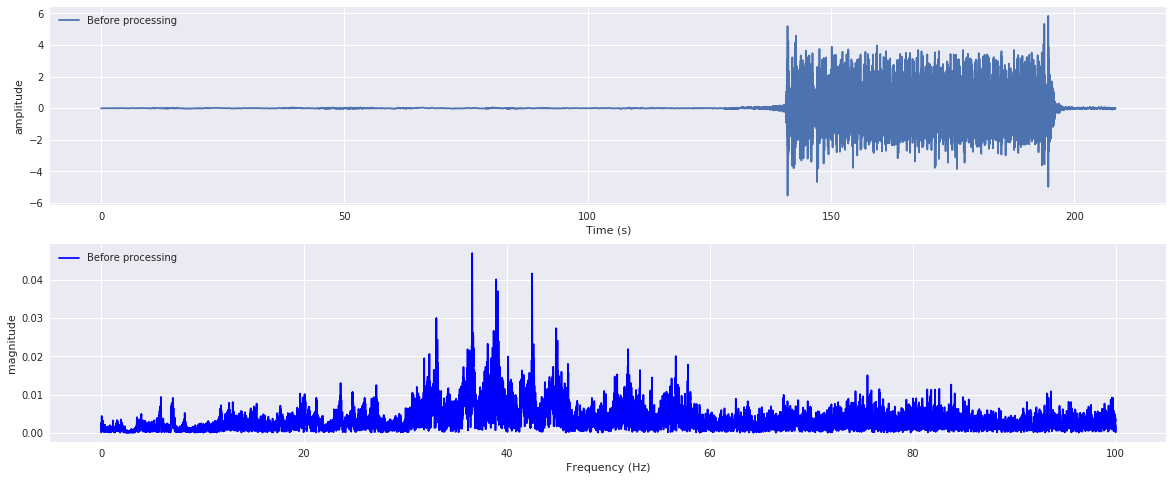

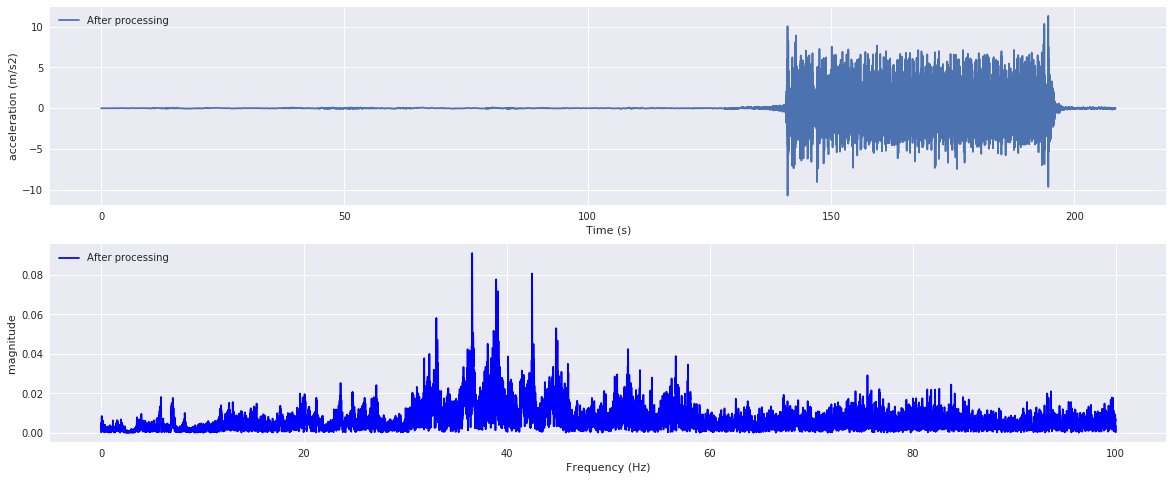

In [241]:
plotting(df1.MGCplus_1, df2.standardizedMGCplus_1)

###### -> For second sensor (MGCplus_2)

<Figure size 576x396 with 0 Axes>

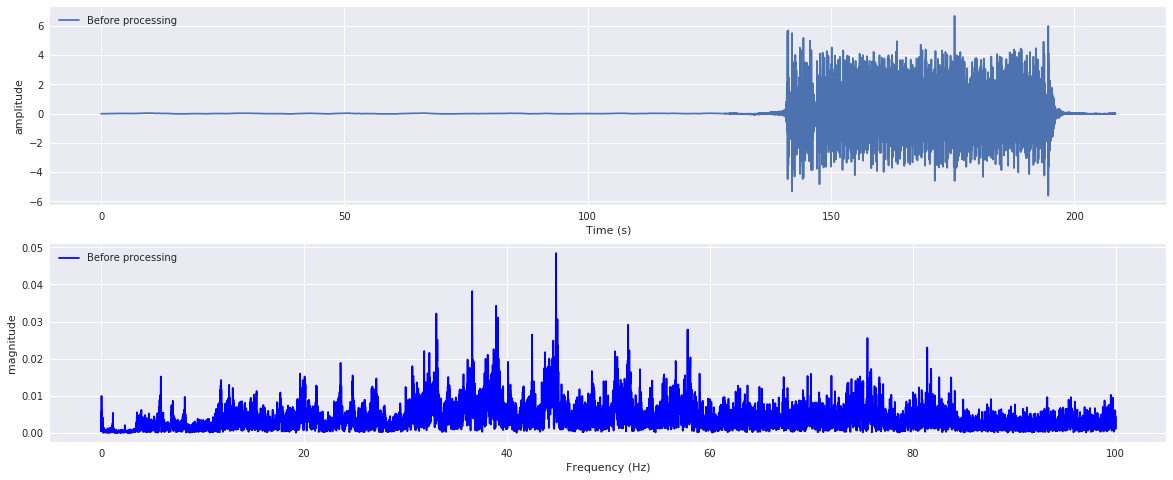

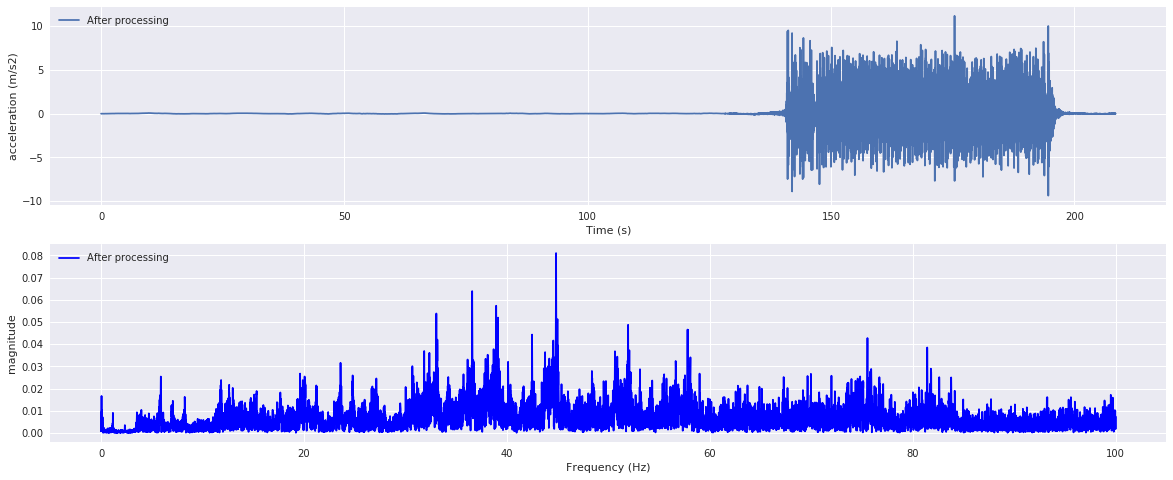

In [242]:
plotting(df1.MGCplus_2, df2.standardizedMGCplus_2)

###### -> For third sensor (MGCplus_3)

<Figure size 576x396 with 0 Axes>

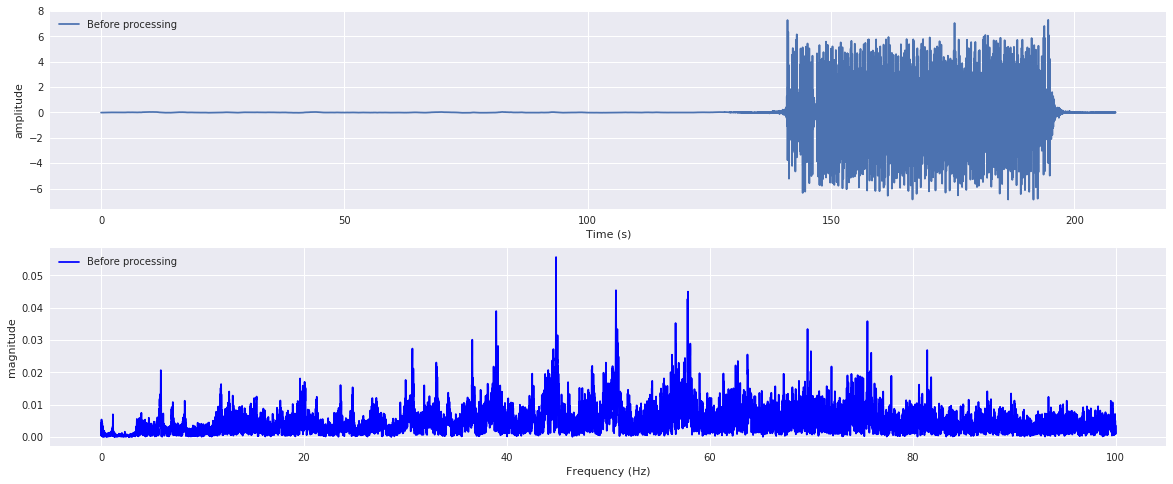

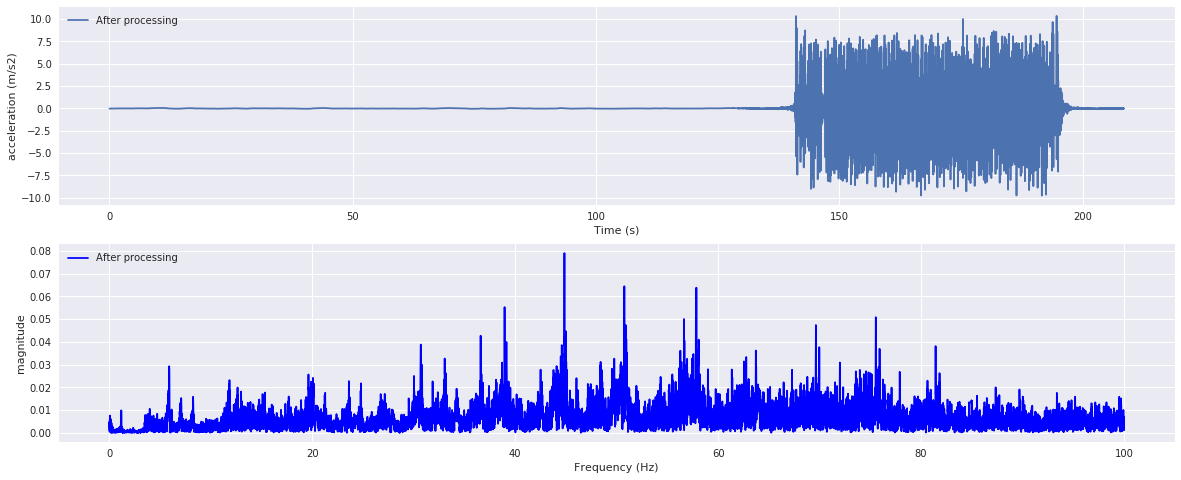

In [243]:
plotting(df1.MGCplus_3, df2.standardizedMGCplus_3)

###### -> For fourth sensor (MGCplus_4)

<Figure size 576x396 with 0 Axes>

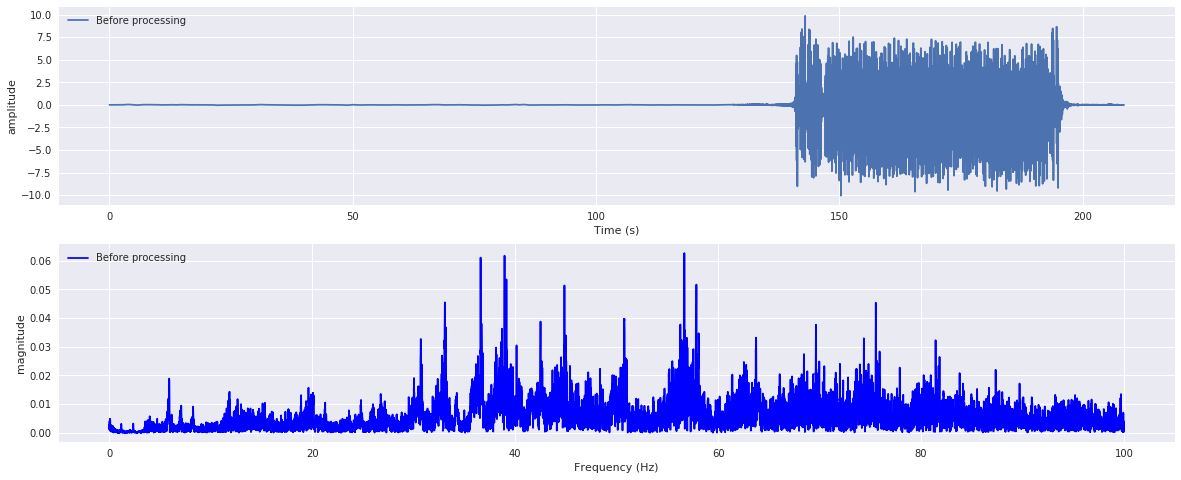

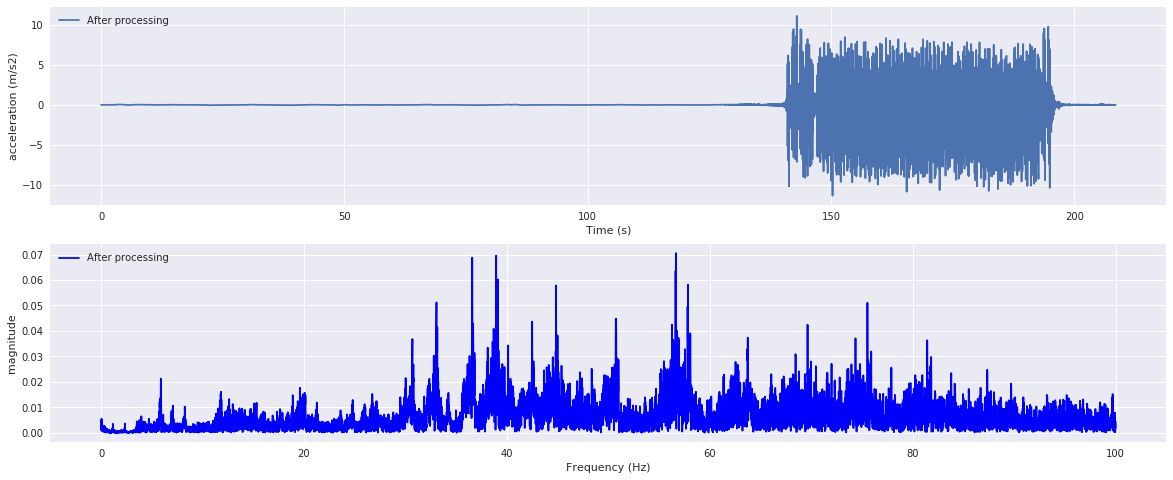

In [244]:
plotting(df1.MGCplus_4, df2.standardizedMGCplus_4)

###### -> For fifth sensor (MGCplus_5)

<Figure size 576x396 with 0 Axes>

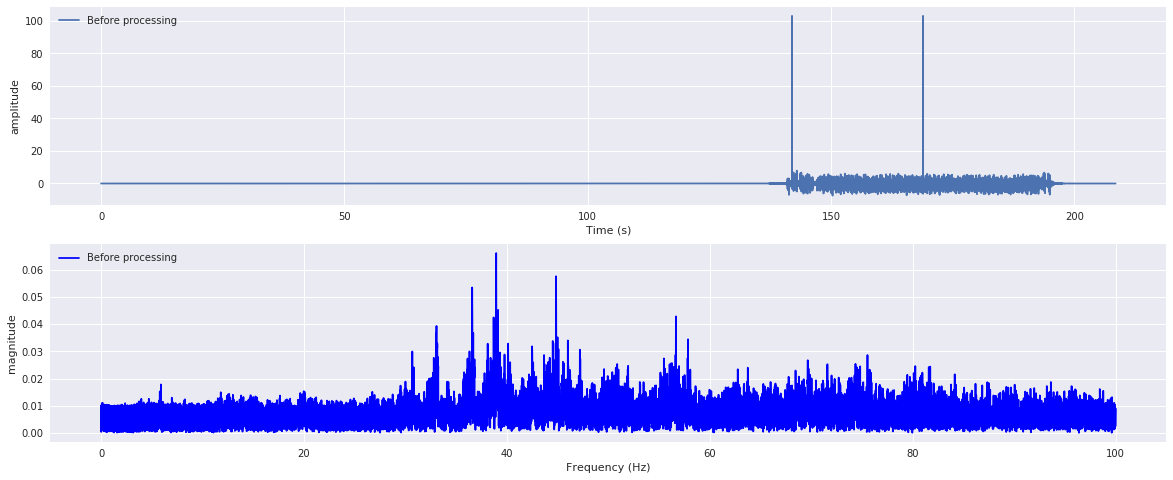

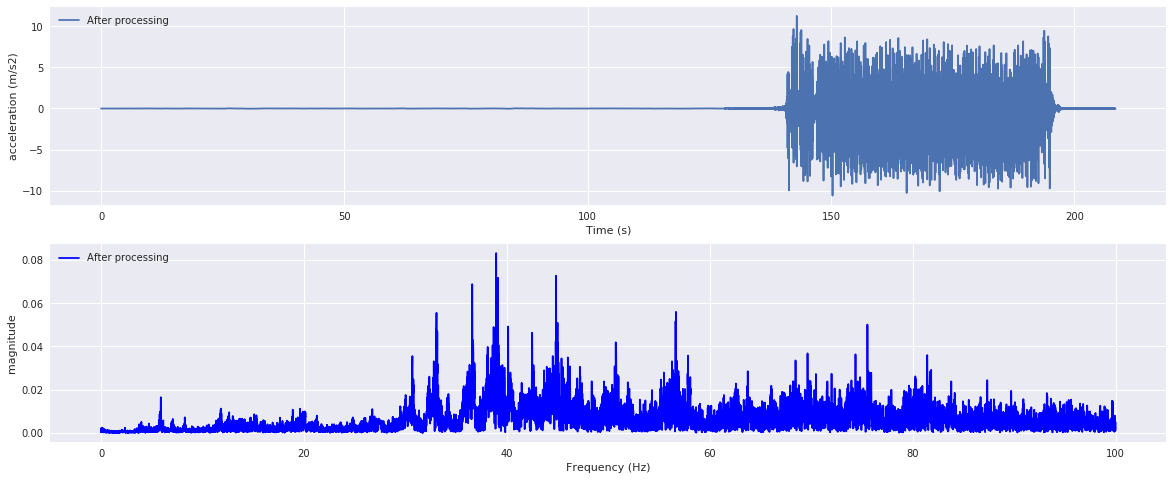

In [245]:
plotting(df1.MGCplus_5, df2.standardizedMGCplus_5)

# Hence, in this Part-I, Data-Preprocessing has been performed in following steps:
### Outlier Removal
### Interpolation
### Standardization